# Splotch Tutorial
Simple PLOTs, Contours and Histograms is a small package with wrapper functions designed to facilitate simplified, concise calls to matplotlib plotting.

## The Basics
The general mantra of Splotch is that most plotting functions should require only a single line of code to manifest, rather than requiring the user to manually specify each aspect of a plot individually. This is taken in a two-fold approach, both in terms of minimising the amount of pre-processing of data needed to produce common scientific plots as well as incorporating the visual modifications (e.g. `axes.set_xlim()`, `axes.set_title()`, `axes.set_xlabel()` ) directly into function calls. Splotch is designed to be a <i>superset</i> of matplotlib.pyplot, given you all the functionality that you already know and "love", plus some useful, intuitive shortcuts for improved quality-of-life.

Splotch functions can be broken down into a set of distinct types:

* **1-Dimensional Plots**:
Plotting functions that can generally be defined as having one independent axis, e.g. `splotch.plot()`, `splotch.hist()`, `splotch.curve()`.

    
* **2-Dimensional Plots**: 
Plotting functions that have an additional independent axis and generally show a third quantity as a color axis, e.g. `splotch.hist2D()`, `splotch.contourp()`.


* **Axis functions**:
Plots that act upon the axes of a matplotlib figure rather than producing a specific plot, e.g. `splotch.colorbar()`, `splotch.adjust_text()`.

## 1-Dimensional Plots

### A Simple plot using matplotlib
The simplest plot one can make is a series of y data against some x data. Producing this in `matplotlib` might look something like the following for a typical user.

In [1]:
# Import some standard libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create some fake data
rng=np.random.default_rng()
xdata=np.linspace(0.0,10.0,num=200)+rng.random(size=200)/10.0
ydata=xdata**3-8*xdata**2+rng.normal(0.0,20.0,size=200)
cdata=3*np.sin(xdata*2)+0.2*abs(ydata)

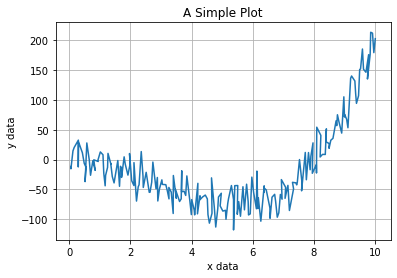

In [3]:
fig, ax = plt.subplots()

#####  MATPLOTLIB USAGE  #####
#--------------------------------------------------------#
ax.plot(xdata,ydata)

ax.set_xlabel("x data")
ax.set_ylabel("y data")
ax.set_title("A Simple Plot")

ax.grid(True)
#--------------------------------------------------------#

plt.show()

Using Splotch, we can replicate the above matplotlib plot in just a single call to `splotch.plot()`. 

**Same outcome, in a single line**.

In [4]:
# import SPLOTCH
import splotch as splt

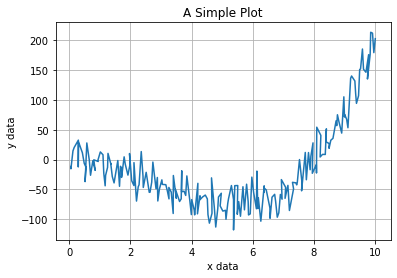

In [5]:
fig,ax=plt.subplots()

#####  SPLOTCH USAGE  #####
#--------------------------------------------------------#
splt.plot(xdata,ydata,xlabel="x data",ylabel="y data",title="A Simple Plot",grid=True)
#--------------------------------------------------------#

plt.show()

### Basic histograms
The same goes for producing basic 1D histograms with SPLOTCH - one line is all it takes. There are also some useful ways to assign binning of the histrogram.

In [28]:
# Create an array with some random distribution
rng=np.random.default_rng()
data = np.concatenate([rng.normal(5.0,2.5,size=2500), rng.normal(10.0,0.5,size=2500)])

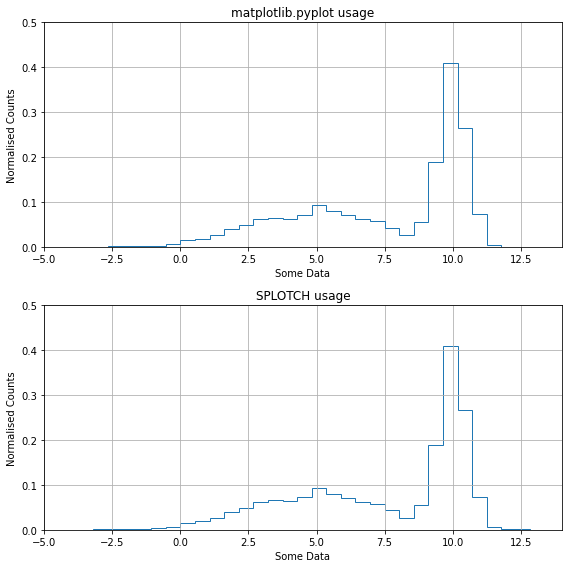

In [29]:
fig, (axes1, axes2) = plt.subplots(ncols=1,nrows=2,figsize=(8,8))


#####  MATPLOTLIB USAGE  #####
#--------------------------------------------------------#
axes1.hist(data,bins=30,density=True,histtype='step')

axes1.set_xlim(-5,14)
axes1.set_ylim(0,0.5)

axes1.grid(True)
axes1.set_xlabel("Some Data")
axes1.set_ylabel("Normalised Counts")
axes1.set_title("matplotlib.pyplot usage")
#--------------------------------------------------------#


#####  SPLOTCH USAGE  #####
#--------------------------------------------------------#
splt.hist(data,bins=30,ax=axes2,xlim=(-5,14),ylim=(0,0.5),dens=True,xlabel="Some Data",
          ylabel="Normalised Counts",title="SPLOTCH usage",grid=True)
#--------------------------------------------------------#

plt.tight_layout()
plt.show()

Aside from encapsulating every aspect of the plot in a single line, `splotch.hist()` also grants some extra functionality on top of the standard `matplotlib.hist()`. 

Using `hist_type`, the histogram can be drawn in three different styles: `step` (based on `pyplot.step`), `line` (`pyplot.plot`) and `bar` (`pyplot.bar`). Furthermore, each one of these has a filled varient, adding `filled` to the type name (e.g., `stepfilled`).

Besides the standard options of specifying bins by either number, width or edges, there is the option `bin_type` which, when set to `equal`, automatically produces a binning scheme where each bin has approximately the same number of elements. Note that this options, while sensible when using `dens=True` for high sampling of dense regions while avoiding noisy results in sparse regions, is quite uninformative when used for raw counts (`dens=False`).

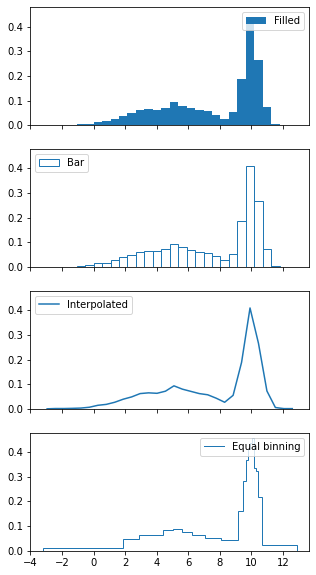

In [32]:
fig, axes = plt.subplots(nrows=4,figsize=(5,10), sharex=True, sharey=True)

### Histogram types
splt.hist(data, bins=30, dens=True, hist_type='stepfilled', label='Filled', ax=axes[0])
splt.hist(data, bins=30, dens=True, hist_type='bar', label='Bar', ax=axes[1])
splt.hist(data, bins=30, dens=True, hist_type='line', label='Interpolated', ax=axes[2])

### Binning types
splt.hist(data, bins=20, dens=True, bin_type='equal', label='Equal binning', ax=axes[3])

plt.show()

### Additional hist() usages
#### Cumulative histograms
If `cumul=True`, this will instead produce a cumulative histogram.
Finally, the `scale` parameter allows the scaling up/down of values in the resulting histogram. Note that in combination with `dens=True` it changes the type of histogram shown, from a PDF to histogram where (if `scale=1`) the area under the curve equates to the number of datapoints.

#### Switching orientation
All variants of hist_type are able to be plotted horizontally along the x-axis by setting the parameter `orientation='horizontal'`.

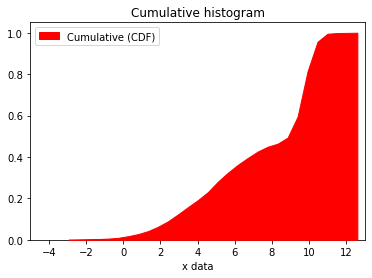

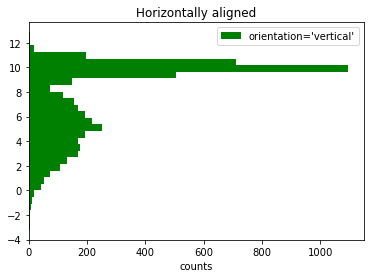

In [38]:
### Cumulative histogram
splt.hist(data, bins=30, dens=True, cumul=True, hist_type='linefilled',
          label='Cumulative (CDF)', zorder=3, color='red', lab_loc=2,
          xlim=(-5,13), ylim=(0,1.05), xlabel="x data", title='Cumulative histogram')

plt.show()

### Switching orientation
splt.hist(data, bins=30, dens=False, orientation='horizontal', hist_type='stepfilled',
          label="orientation='vertical'", color='green',
          xlabel="counts", title='Horizontally aligned')

plt.show()

## Axis lines

### The generalised axline function
Often, a single line needs to be overplotted, such as a straight vertical or horizontal line on a plot, or sometimes a diagonal line (e.g. one-to-one lines). Indeed, matplotlib provides the `axhline` and `axvline` functions, but these do not provide the generalised functionality required for a diagonal line, nor do they allow the user to plot multiple offset lines simultaneously.

The `splotch.axline()` function allows the user to specify either the `x` or `y` value(s) for a vertical or horizontal line, respectively, or, in the more generalised case of a diagonal line defined by the function $y = a*x + b$, where $a$ and $b$ are the slope and intercept, respectively. Some examples are shown below:

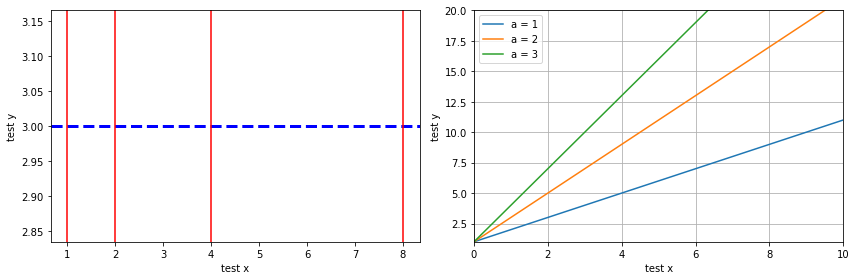

In [57]:
fig, axes = splt.subplots(ncols=2)

# Plot a single horizontal line
splt.axline(y=3, color='blue', linestyle='--', linewidth=3, ax=axes[0])

# Plot multiple vertical lines at the same time
splt.axline(x=[1,2,4,8], color='red', ax=axes[0],
            xlabel="test x", ylabel="test y")

# Plot some diagonal lines and modify some of the axis appearance at the same time
splt.axline(a=[1,2,3], b=1, ax=axes[1],
            xlabel="test x", ylabel="test y",label=["a = 1","a = 2","a = 3"],
            xlim=(0,10), ylim=(1,20), grid=True)

plt.legend()

fig.tight_layout()
plt.show()

## Generalised curves based on expressions
Often, the curves we wish to plot are not straight lines but are curves defined by a mathematical expression with a dependent and independent variable, e.g.

$y = 4*x^2$ 

$L = 4\times 10^{-21}(1+z)\,e^{-\nu}$

$(y^2 + x^2 - 1)^3 - x^2 y^3 = 0 $, and so on.

The `splotch.curve()` function can be used to plot a python function or a mathematical expression given as a string (e.g. expr="4*x^2") as a curve that can be modified exactly like a line in the examples above for `splotch.axline()`. An expression requires at least one independent variable ('x' by default, but can be changed using the 'var' parameter).

Using the example of our simple data, the `splotch.curve()` function is used below to generate a line for the expression:
$y = x^{3} - 8x^{2}$

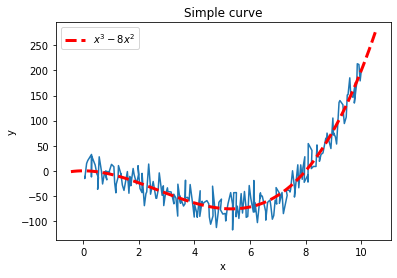

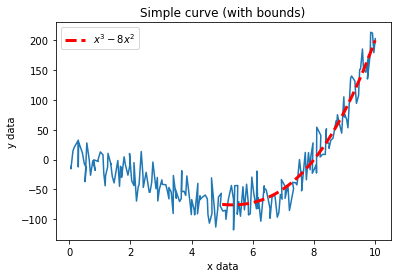

In [41]:
### Simple generation of a curve given a mathematical expression
splt.plot(xdata, ydata, xlabel="x", ylabel="y")
splt.curve(expr='x^3 - 8*x^2', title="Simple curve",
           color='red', linestyle='--', lw=3)
plt.legend()

plt.show()

### Applying bounds to the expression, which will plot the curve in the range bounds=(from, to)
splt.plot(xdata, ydata, xlabel="x data", ylabel="y data", grid=True)
splt.curve(expr='x^3 - 8*x^2', bounds=(5,10), title='Simple curve (with bounds)',
           color='red', linestyle='--', lw=3)
plt.legend()

plt.show()

### Supplying substitution variables in an expression.
An expression can optionally include any number of substitution variables. A substitution variable is a place holder that will generate as many lines as the number of values provided to the substition variables in the `subs` dictionary. Any `Line2D` arguments can be applied to each of the lines if given as a list with equivalent length to the number of subs. If a `Line2D` property is only given a single value, this will be applied to all lines.

By setting `permute=True`, this will result in every possible combination of lines using all of the values given to the substitution variables.

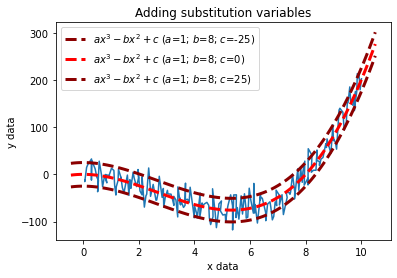

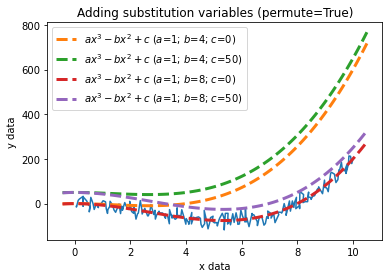

In [56]:
splt.plot(xdata, ydata, xlabel="x data", ylabel="y data", grid=True)
splt.curve(expr='a*x^3 - b*x^2 + c', subs={'a': 1, 'b': 8, 'c': [-25, 0, 25]}, title='Adding substitution variables',
           color=['darkred', 'red', 'darkred'], linestyle='--', lw=3)
plt.legend()

plt.show()


# Setting `permute=True` will give every combination of all substitutions given.
splt.plot(xdata, ydata, xlabel="x data", ylabel="y data", grid=True)
splt.curve(expr='a*x^3 - b*x^2 + c', subs={'a': 1, 'b': [4, 8], 'c': [0, 50]}, permute=True, title='Adding substitution variables (permute=True)',
           linestyle='--', lw=3)
plt.legend()

plt.show()

## Piecewise curves
Some expressions have a different functional form depending on the domain over which they cover, these are known as piecewise functions and can be plotted in splotch using the `cureve_piecewise` function.

To define a piecewise function, parse a list of $n$ expressions along with a list of $n-1$ transtition points to `intervals`.

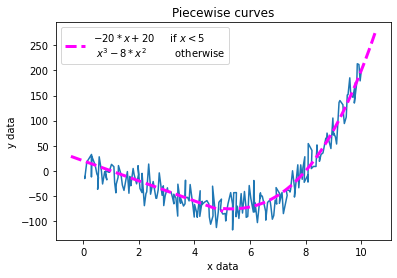

In [52]:
splt.plot(xdata, ydata, xlabel="x data", ylabel="y data", grid=True)
splt.curve_piecewise(expr=['-20*x + 20', 'x^3 - 8*x^2'], intervals=5, 
                     label="$-20*x + 20$\t if $x < 5$\n $x^3 - 8*x^{2}$\t otherwise", title='Piecewise curves',
                     color=['magenta'], linestyle='--', lw=3)

plt.legend(loc=2)
plt.show()

## Broken axis plots
Sometimes you wish to plot some data that has a discontinuity at some point, but to plotting it on one axis stretches the limits of the axis. Instead, placing a break in the plot can highlight the low and high regimes of the data without sacrificing the stretch on the limits.

In [53]:
xbroken = np.append(np.arange(0.0,1.0,step=0.02),np.arange(20.0,30.0,step=0.02))
ybroken = xbroken**0.5+np.random.normal(1.0,0.2,size=len(xbroken))

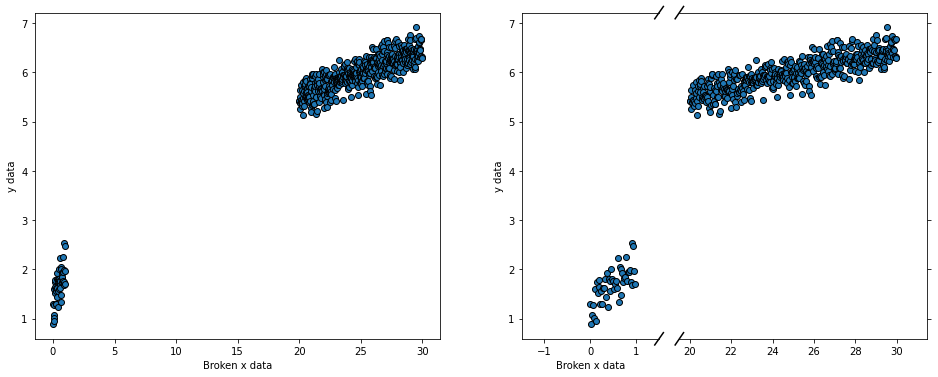

In [54]:
fig,axes=splt.subplots(ncols=2,wspace=0.5,figsize=(16,6))

splt.plot(xbroken, ybroken, ax=axes[0], xlabel='Broken x data',
          ylabel="y data", linestyle='', marker='o', mec='black')

splt.brokenplot(xbroken,ybroken,ax=axes[1],xbreak=[1.5,19.5],xlabel='Broken x data',
                ylabel="y data",linestyle='',marker='o',mec='black')

plt.show()

## 2-Dimensional Plots

### 2D Images and Colorbars
splotch has a fairly simple wrapper around the currently available `pyplot.imshow()` (or `pyplot.matshow()`) function but with some additional useful utilities. 

Furthermore, color bars that map the color-axis to a set of quantities can often be tedious to create in matplotlib usage. In splotch, you can turn on color bars within most 2D functions simply by setting `clabel` and can also make use of paramters such as `clog`, `clim`, `cmap`, `cbar_invert`, etc.

Alternatively, one can make use of the `splotch.colorbar()` which gives the user far more control over the positioning of your colorbar.

In the topic of colour, splotch includes the [scicm](https://github.com/MBravoS/scicm) set of colour maps and manipulation tools. The colour maps are registered as `scicm.{colour_map_name}` into the matplotlib list of colour maps. The colour map objets and manipulations tools are accesible in the `splotch.cm` and `splotch.cm_tools` sub-packages, respectively.

In [58]:
### Create an image of a 2D Gaussian
X,Y = np.meshgrid(np.linspace(-1,1,25),np.linspace(-1,1,25))
img = 5*np.exp(-((X)**2+(Y)**2)/2.0 * 2.0**2)

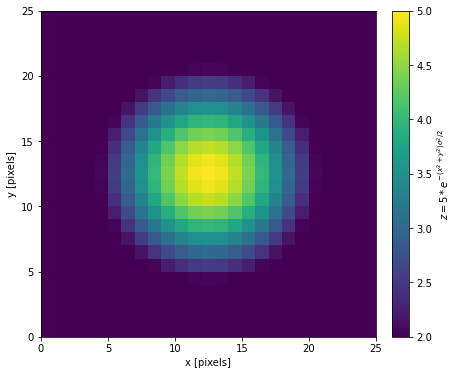

In [59]:
fig,axes=plt.subplots(figsize=(6,6))

splt.img(img, clim=(2,5), xlabel="x [pixels]", ylabel="y [pixels]")

splt.colorbar(label="$z = 5*e^{-(x^2 + y^2)\\sigma^2/2}$")

plt.show()

### Scatter Plots
Here is a general usage of the `splotch.scatter()` function, which generally takes both `xdata` and `ydata` as well as `cdata`, the information required for plotting on the color-axis.

In [60]:
# Create some data representing two multi-variate 2D Gaussians, the details are not improtant here.
num = 10000
xvals, yvals = np.append(np.random.multivariate_normal([5,10], [[2,1],[1,2]],size=num//2).T,
                        np.random.multivariate_normal([8,6],  [[2,0],[0,2]],size=num//2).T, axis=1) 

cvals = (xvals+yvals)**2 + np.random.normal(0,15,size=len(xvals)) # The color-axis quantities

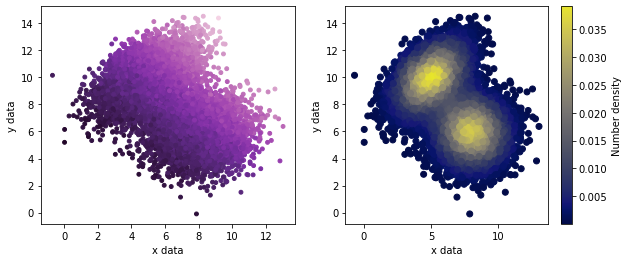

In [61]:
fig,axes = plt.subplots(ncols=2,figsize=(10,4))

# Use the color-axis quatinies
splt.scatter(x=xvals, y=yvals, c=cvals, ax=axes[0], cmap='scicm.Purple',
             xlabel="x data", ylabel="y data", s=15)

# Instead let the color-axis represent the number density at each point
splt.scatter(x=xvals, y=yvals, density=True, ax=axes[1], xlabel="x data", ylabel="y data",
             clabel="Number density", cmap='scicm.BgreyY')

plt.show()

### 2D Histograms
With Splotch, binning two-dimensional data to produce density distributions or calculating statistics (e.g. mean, median, sum) simultaneously across two axes has never been easier! Simply passing your x and y data into `splotch.hist2D( )` will provide all the necessary functionality of working with 2-dimensional data. Let's use the same data from the scatter plot tutorial.

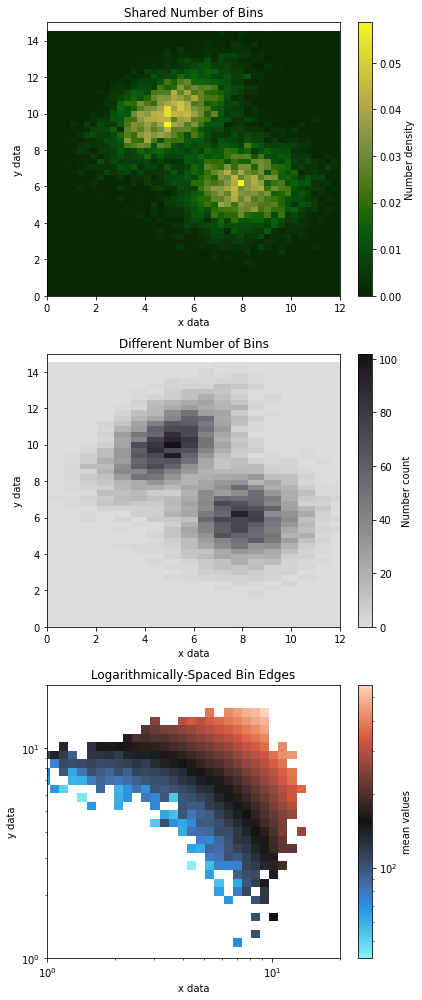

In [64]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(6,14))

# A set number of bins across both axes
splt.hist2D(xvals, yvals, xlim=(0,12), ylim=(0,15), bins=50, xlabel="x data", ylabel="y data", cmap='scicm.G2Y',
            clabel="Number density", title="Shared Number of Bins", ax=axes[0])

# Different numbers of bins for each axis
splt.hist2D(xvals, yvals, xlim=(0,12), ylim=(0,15), dens=False, bins=[20,50], xlabel="x data", ylabel="y data",
            clabel="Number count",title="Different Number of Bins",cmap='scicm.Stone_r',ax=axes[1])

# Array defining arbitrarily-spaced bin edges (e.g. logarithmic below)
splt.hist2D(xvals, yvals, c=cvals, xlim=(1,20), ylim=(1,20), dens=False, bins=np.linspace(-1,2,num=75),
            clog=True, xlog=True, ylog=True, xlabel="x data", ylabel="y data", cstat='mean',
            clabel="mean values", title="Logarithmically-Spaced Bin Edges",
            cmap='scicm.BkR', ax=axes[2])

fig.tight_layout()
plt.show()

#### Binned statistics in one and two-dimensional histograms
Both `splotch.hist` and `splotch.hist2D` provide the option of making binned statistics. This is done passing the kwarg `v` or `c`, respectively. The kwarg `vstat`/`cstat` control the type of statistic to be used, and accepts the same inputs as `scipy.stats.binned_statistic`.

In [65]:
x = np.linspace(0,5,10000)
y = x**2 + rng.gamma(1,10,10000)
z = np.cos(3*x)

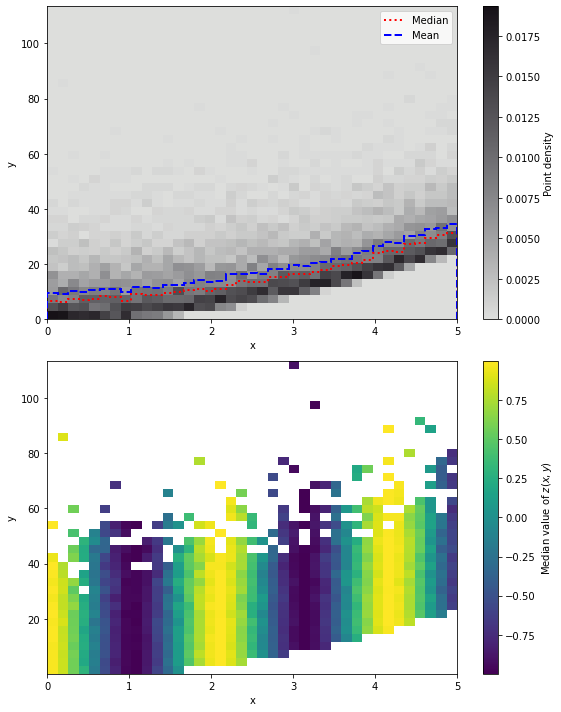

In [70]:
fig, axes = splt.subplots(nrows=2,figsize=(8,10))

## Get the median and mean values in bins along the x-axis
splt.hist([x]*2, v=[y]*2, ax=axes[0], zorder=3,
          vstat=['median','mean'], label=['Median','Mean'], color=['red','blue'], lw=2,
          linestyle=['dotted','dashed'])

# Plot the 2-dimensional histogram in the background
splt.hist2D(x, y, cmap='scicm.Stone_r', ax=axes[0],
            xlabel='x', ylabel='y',clabel='Point density')

## Binned statistics in 2-dimension
splt.hist2D(x, y, c=z ,cstat='median', ax=axes[1], 
            xlabel='x', ylabel='y', clabel='Median value of $z(x,y)$')

fig.tight_layout()
plt.show()

### Contour plots

#### Percentile Contour Plots: 
Given some x and y data, a percentile contour plot will create contours around specified percentiles of the density distribution in two dimensions.

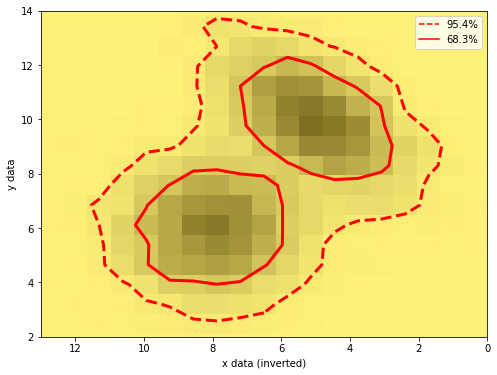

In [82]:
fig,axes=plt.subplots(figsize=(8,6))

# Basic percentile contours enclosing 68% (~1 sigma) and 95% (~2 sigma) of the data.
splt.hist2D(xvals, yvals, bins=[20,20], cmap='scicm.SoftYellow_r')
splt.contourp(xvals, yvals, bins=[20,20], xinvert=True, yinvert=False,
              colors='red', linewidths=3,
              xlim=(0, 13), ylim=(2, 14), xlabel="x data (inverted)", ylabel="y data")

plt.show()

The contours above encircle the 68$^{th}$ and 95$^{th}$ percentiles of the number density of particles in bins along the x- and y-axis, effectively the 1- and 2-sigma dispersions, respectively.These percentage levels can be specified using the `percent` argument. 

Rather than using different linestyles for the contours as is the default shown in the example above, a colormap can be mapped onto the contours where each line color is drawn from the colormap given to `cmap`.

If the bins are too finely, the resulting contours with appear quite jagged. This can be improved using the `smooth` parameter to apply a Gaussian kernel filter.

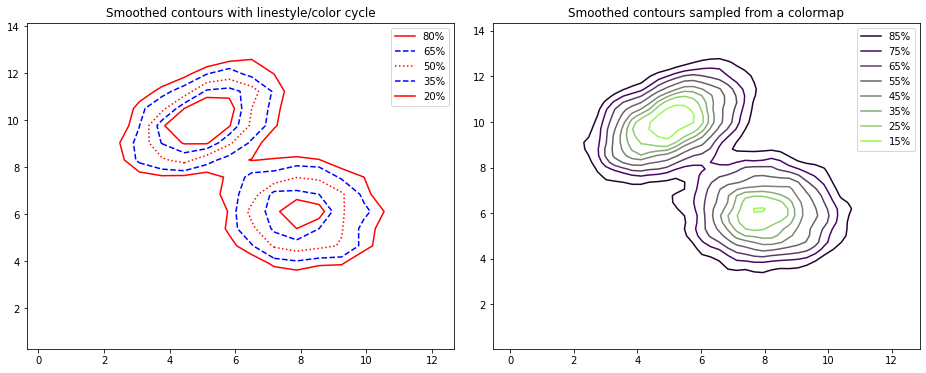

In [83]:
fig, axes = splt.subplots(naxes=2,figsize=(16,6))

# Cycle between different colors and linestyles
splt.contourp(xvals, yvals, bins=[20,20], percent=np.arange(20,95,step=15), ax=axes[0],
              linestyles=['-','--',':','--','-'], colors=['red','blue','red','blue','red'],
              title="Smoothed contours with linestyle/color cycle")

# Generate contours with colours sampled from a colormap and smooth the resulting coontours.
splt.contourp(xvals, yvals, bins=[50,50], percent=np.arange(15,95,step=10), smooth=1.0, linestyles='-',
              cmap='scicm.PgreyG', ax=axes[1], title="Smoothed contours sampled from a colormap")

plt.show()

### Sector Plots
Sector plots (a.k.a. "pizza slice" plots) are useful for plotting the spatial distribution of data containing one radial axis (r) and another corresponding to an angle (theta), typical of polar coordinates. This function creates a floating axis that can be rotated accordingly.

In [84]:
# Create some mock polar-coordinate data
thetaArr = np.random.uniform(low=30.0,high=150.0,size=1000)
rArr = np.random.gamma(shape=2.0,scale=0.3,size=1000)
cArr = 9.0 + 5* rArr + np.random.normal(0.0,2.0,size=1000)

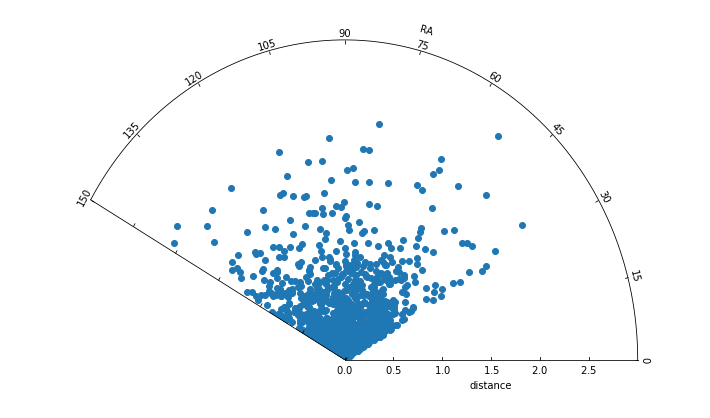

In [85]:
## Basic sector plot defining the theta and radial limits
fig=plt.figure(figsize=(10,6))

splt.sector(theta=thetaArr,r=rArr,thetalim=(0.0,150.0),rlim=(0.0,3.0),
            rlabel="distance",thetalabel="RA")

fig.tight_layout()
plt.show()

Under the hood, the data presented in a sector plot abides by the functionality of a scatter plot, hence the user can parse any parameters specific to `scatter()` into the `splotch.sector()` function. In the example below, a color axis is used to indicate the values of a third parameter. 

Using the `rotate` parameter gives the user the ability to control the spatial orientation of the sector axis itself, see the second example below.

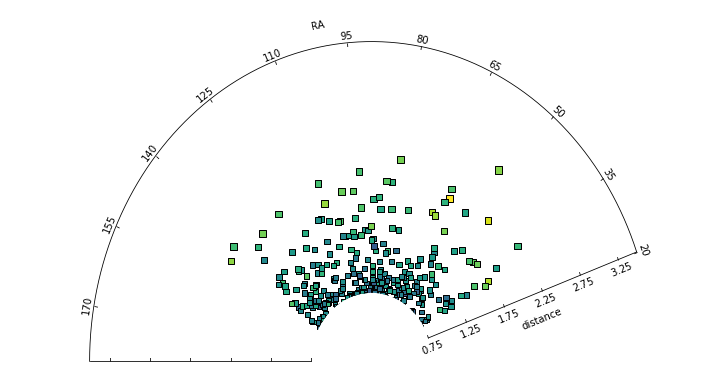

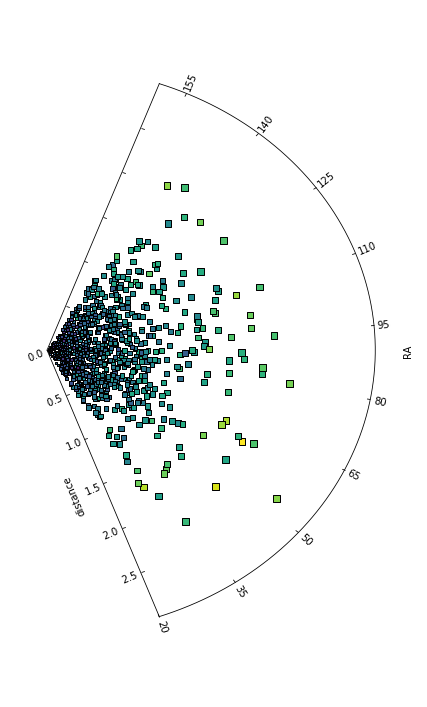

In [86]:
# Parse scatter() specific arguments into the sector plot
fig = plt.figure(figsize=(10,6))
splt.sector(theta=thetaArr, r=rArr, thetalim=(20.0,180.0), rlim=(0.75,3.5),
            rlabel="distance", thetalabel="RA",
            c=cArr, edgecolor='black', marker='s', s=25*rArr**0.8)

fig.tight_layout()

# Rotate the sector plot using the `rotate` argument
fig = plt.figure(figsize=(6,10))
splt.sector(theta=thetaArr, r=rArr, thetalim=(20.0,160.0), rlim=(0.0,3.0),
            rlabel="distance", thetalabel="RA", rotate=90.0,
            c=cArr, edgecolor='black', marker='s', s=25*rArr**0.8)

fig.tight_layout()
plt.show()

## Axis-specific Functions

### Figure Subplots

The `plt.subplots()` function within matplotlib is sufficient to create an N$\times$M grid of axis subplots within a figure. However, if one wishes to create a set of axes that cannot be represented in the usual NxM layout (e.g. `naxes = 7`), your options are limited. The `splotch.subplots()` function allows the user to specify an arbitrary number of axes in numerous orientations made up of N rows $\times$ M columns.<br><br>

Here's how the `naxes` feature looks in practice:

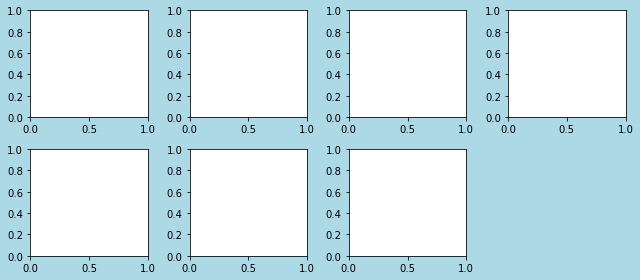

In [87]:
# Specifying an arbitrary number of axes
fig, axes = splt.subplots(naxes=7, figsize=(9,4), facecolor='lightblue')

fig.tight_layout() # to avoid overlap of labels and ticks
plt.show()

#### Axis alignments with splotch.subplots()
In the case of `naxes=7`, there are various configurations for this particular 2 $\times$ 4 grid that one could imagine placing the 7 subplots within. This functionality is controlled using the `ha` (horizontal alignment) and `va` (vertical alignment) arguments. `ha` accepts <i>'left'</i>, <i>'right'</i> and <i>'center'</i>, whereas `va` accepts <i>'top'</i>, <i>'bottom'<i> and </i>'center'</i>.<br><br>

Here are a few examples of different subplots configurations:

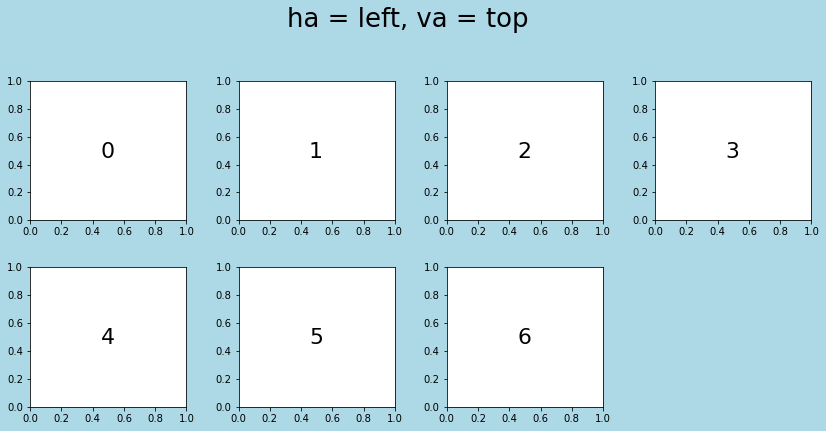

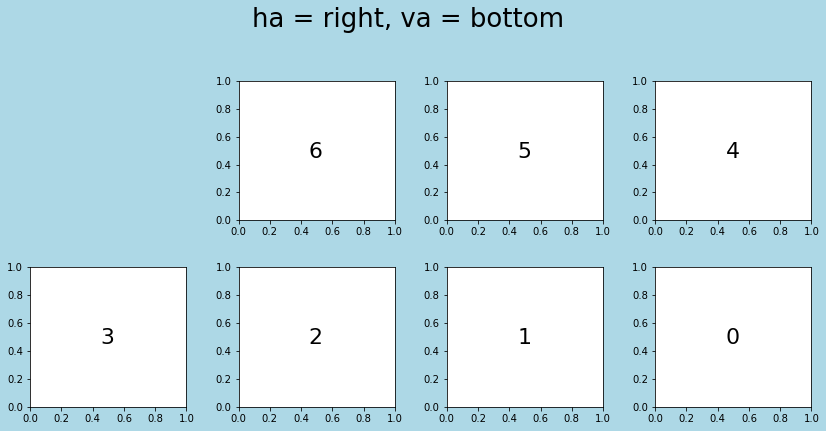

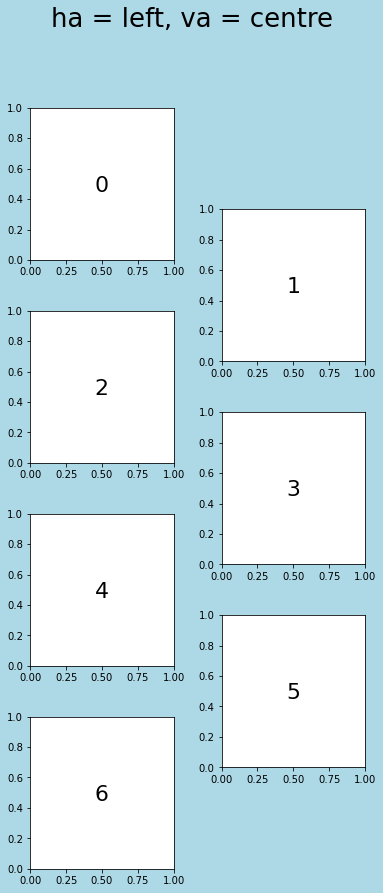

In [88]:
# horizontal alignment: left;  vertical alignment: top (Defaults)
fig, axes = splt.subplots(naxes=7,ha='left',va='top',figsize=(14,6),hspace=1,wspace=1,facecolor='lightblue')  
fig.suptitle("ha = left, va = top",fontsize=26,y=1.05)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

# horizontal alignment: right;  vertical alignment: bottom
fig, axes = splt.subplots(naxes=7,ha='right',va='bottom',figsize=(14,6),hspace=1,wspace=1,facecolor='lightblue') 
fig.suptitle("ha = right, va = bottom",fontsize=26,y=1.05)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

# horizontal alignment: centre;  vertical alignment: bottom (with two columns)
fig, axes = splt.subplots(naxes=7,ncols=2,ha='left',va='centre',figsize=(6,14),hspace=1,wspace=1,facecolor='lightblue') 
fig.suptitle("ha = left, va = centre",fontsize=26)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

plt.show()

#### Notes on splotch.subplots()
Note that the alignments chosen also impact the order in which each axis instance are arranged within the `axes` array that is returned. Whilst the user can specify any combination of `naxes`, `nrows` and `ncols`, the function will raise an exception if `nrows*ncols != naxes`. The only combination of `ha` and `va` that is not allowed is when both are specified as <i>'centre'</i>, as in addition to being nonsensical in most cases, also raises an ambiguiety in the ordering in the resulting array of subplots.

### Cornerplots
Cornerplots are a useful tool for visualising multi-dimensional samples in one- and two-dimensional prokections to reveal covariances the data. These are commonplace for displaying the results of a Markov Chain Monte Carlo optimisation of a set of covariate parameters in a model.

A basic example is shown below.

In [89]:
import pandas as pd # for storing columns in a data frame

In [90]:
# Create some mock data
ndim = 6 # Number of dimensions in the data
nsamples = 10000 # the number of independent samples in, for example, an MCMC chain

data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([ 4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([ nsamples // 5, ndim]))

data = np.vstack([data1, data2])
data = pd.DataFrame(data, columns=['Alpha','Beta','Gamma','Delta','Epsilon','Zeta'])

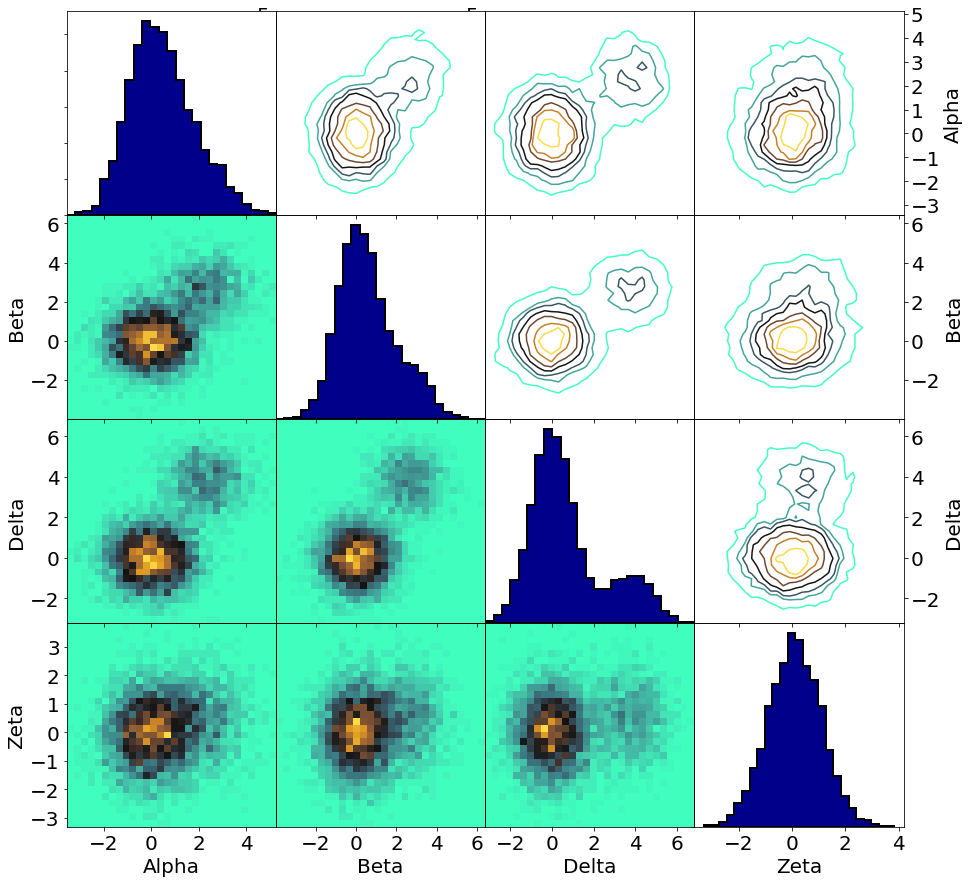

In [91]:
fig, axes = splt.cornerplot(data,figsize=(15,15),columns=['Alpha','Beta','Delta','Zeta'],
                nsamples=5000,pair_type=['hist2D','contour'],
                hist_kw=dict(histtype='stepfilled',fc='darkblue',ec='black',linewidth=2,bins=25),
                hist2D_kw=dict(bins=30,cmap='scicm.TkO'),
                contour_kw=dict(percent=np.linspace(15,95,num=7),cmap='scicm.TkO',linestyles='-',smooth=0.6,plabel=False))

# Use splotch.adjust_text() to modify the x/y labels and tick labels of all subplots at the same time
splt.adjust_text(which='xyk',fontsize=20,ax=axes)

plt.show()

Note that the user can specify what type of 2D representation of the data (either scatter, hist2D or contour) should be displayed on one (or both) of the off-diagonal corners. To modify the arguments of these individual plot types, simply parse a corresponding keyword dictionary for each, i.e. `scatter_kw`, `hist2D_kw` or `contour_kw`.

Let's now try an example with the `emcee` MCMC optimisation package.

In [92]:
import emcee

# Define the log probability function to minimise
def log_prob(x, mu, cov):
    diff = x - mu
    return (-0.5 * np.dot(diff, np.linalg.solve(cov, diff)))

ndim = 5
np.random.seed(42)
means = np.random.rand(ndim)

# Create a covariance matrix across the N-dimensional space
cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [93]:
## Now let's perform the MCMC optimisation
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim) # a matrix of 32 walkers each with 5 random guesses for the parameters

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

state = sampler.run_mcmc(p0, 100)
sampler.reset()

sampler.run_mcmc(state, 10000)
samples = sampler.get_chain(flat=True)

samples = pd.DataFrame(samples,columns=["Alpha","Beta","Gamma","Delta","Epsilon"])

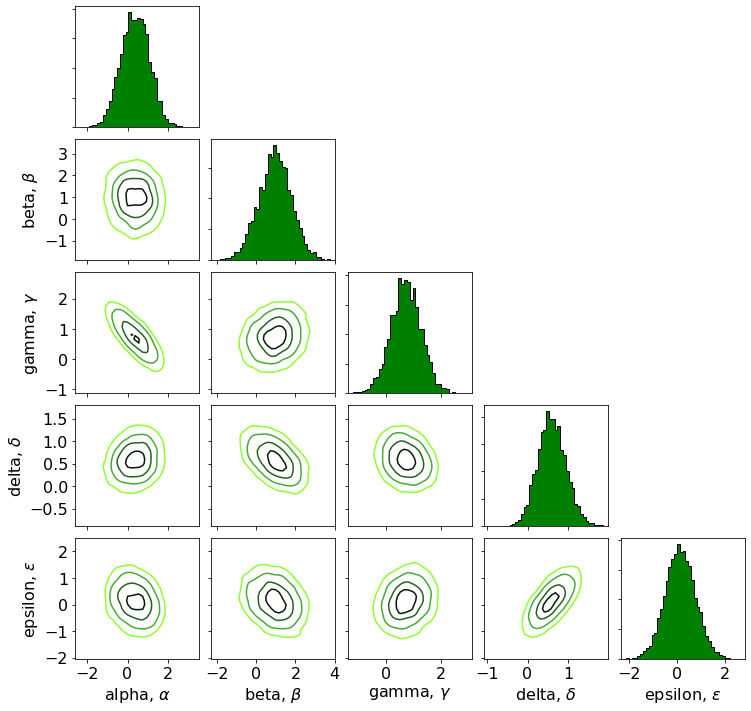

In [94]:
fig, axes = splt.cornerplot(samples,figsize=(12,12),nsamples=5000,pair_type='contour',
                labels=['alpha, $\\alpha$','beta, $\\beta$','gamma, $\\gamma$','delta, $\\delta$','epsilon, $\\epsilon$'],
                hist_kw=dict(histtype='stepfilled',fc='green',ec='black',bins=40),hspace=0.1,wspace=0.1,
                contour_kw=dict(smooth=1,percent=(25,50,75,90),cmap='scicm.Green_r',plabel=False))

splt.adjust_text(which='xyk',fontsize=16, ax = axes)

plt.show()

### Adjusting Text in Splotch
Text within plots can be treated as its own separate entity. As such, Splotch provides the `adjust_text()` function as a way to have overarching control over all text objects within a plot. This function can apply one (or many) adjustments to the text properties of any number of text instances. The different types of text instances accessible by `adjust_text()` are specified using the `which` argument and include:

	* 'x'|'xlabel'       : x-axis label 
	* 'y'|'ylabel'       : y-axis label 
	* 't'|'title'        : Title
	* 's'|'suptitle'     : Super-title (Not implemented)
	* 'l'|'legend'       : Legend text
    * 'L'|'legend title' : Legend titles
	* 'c'|'colorbar'     : Color bar (Limited to a single colorbar)
	* 'T'|'text'         : Text objects
	* 'a'|'all'          : All instances of all the above
    
    
Below, are several rather exuberant usages of the `splotch.adjust_text()` function.

In [95]:
# Create some mock data representing two multi-variate 2D Gaussians
num = 10000
xvals, yvals = np.random.multivariate_normal([5,10],[[2,1],[1,2]],size=num//2).T

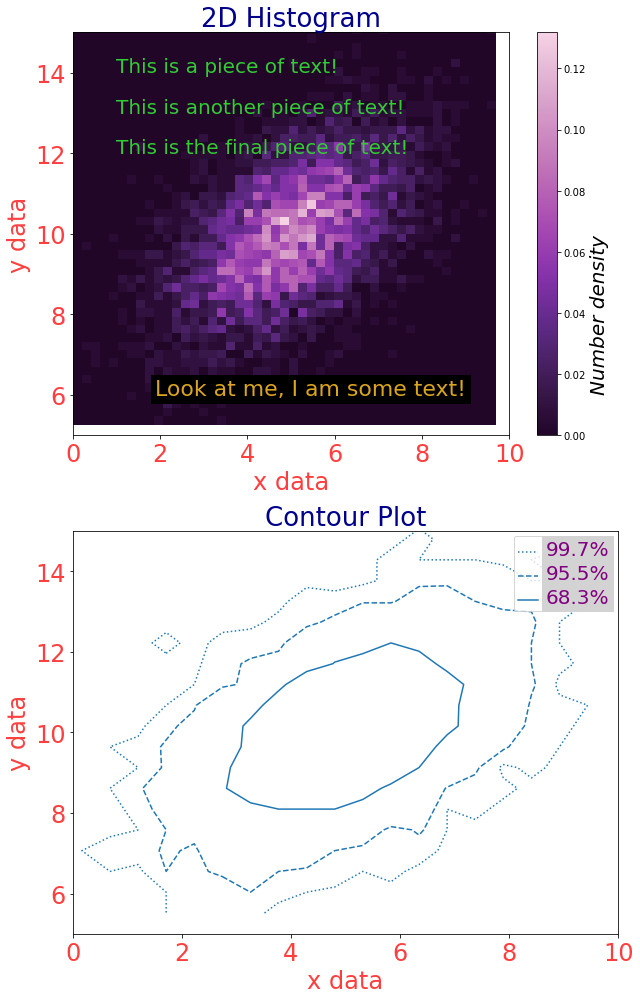

In [101]:
### Plot some data with lots of text intances
fig, axes = splt.subplots(nrows=2, ncols=1, figsize=(9,14))

splt.hist2D(xvals,yvals,xlim=(0,10),ylim=(5,15),bins=50,xlabel="x data",ylabel="y data",
            clabel="Number density",title="2D Histogram",ax=axes[0], cmap='scicm.Purple')

splt.contourp(xvals,yvals,percent=[68.3,95.5,99.7],bins=[20,20],lab_loc=1,xlim=(0,10),
              ylim=(5,15),xlabel="x data",ylabel="y data",title="Contour Plot",
              ax=axes[1])

text1=axes[0].text(1,14,"This is a piece of text!")
text2=axes[0].text(1,13,"This is another piece of text!")
text3=axes[0].text(1,12,"This is the final piece of text!")
text4=axes[0].text(9,6,"Look at me, I am some text!",ha='right')


### Using splotch.adjust_text() ###

# Adjust x and y labels and tic`k` labels on all axes
splt.adjust_text(['x','y','k'], fontsize=24, color='red',alpha=0.75, ax=axes)

# Adjust title font on only one axis
splt.adjust_text('t',fontsize=26,ax=axes,color='darkblue')

# Adjust colorbar font
splt.adjust_text('c',fontsize=20,fontstyle='italic',fontvariant='small-caps',
                 horizontalalignment='right')

# Adjust labels in legend
splt.adjust_text('l',fontsize=20,color='purple',backgroundcolor='lightgrey',ax=axes[1])

# Adjust all text instances in an axis.
splt.adjust_text('T',fontsize=20,color='limegreen',ax=axes[0])

#... or adjust a specific Text object
splt.adjust_text(text4,fontsize=22,color='goldenrod',backgroundcolor='black',ax=axes[0])

fig.tight_layout()
plt.show()

All of the above could be achieved in a single-line if desired

In [102]:
splt.adjust_text(['x','y','t','c','l','T',text4],fontsize=[22,22,26,20,20,20,22],
                 color=['red','red','darkblue','black','black','green','goldenrod'],ax=axes)


## Keyword arguments
### Don't be afraid, they are you friends
 
One of the core features of Splotch is that at its core, it is a wrapper around matplotlib.pyplot. This gives the user complete access to not only the Splotch-specific functionalities (e.g. `xlabel`, `title`, `grid`, etc.), but also access to all of the underlying `pyplot` parameters using keyword arguments (kwargs). One can use the `plot_kw` (or `test_kw`, `bar_kw`, etc.) parameter to provide a dictionary of `matplotlib` specific arguments that are parsed into the corresponding matplotlib plotting function. Alternatively, simply specifying the parameters as they are named within pyplot functions will be collate them together into a dictionary of kwargs that acts the same as though they were specified explicitly in `plot_kw`.

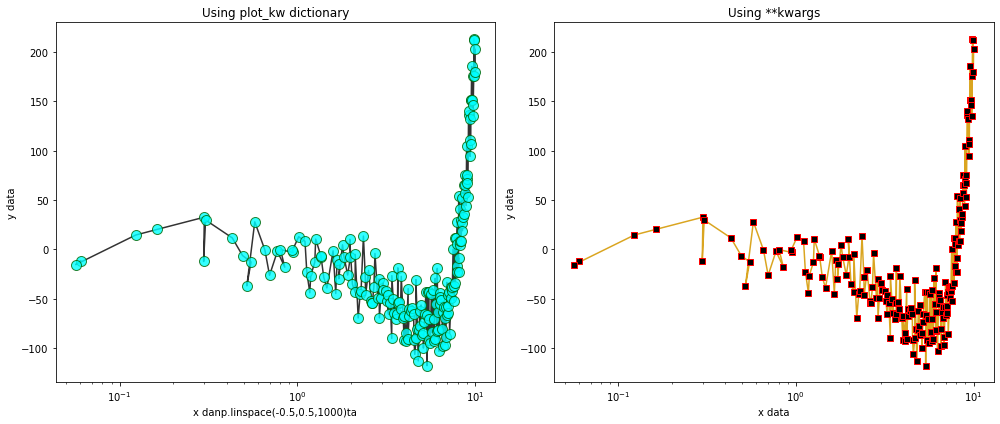

In [103]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6))

# Basic plot explicitly using plot_kw dictionary
kw_dict = dict(marker='o',
               markersize=10,
               markerfacecolor='cyan',
               markeredgecolor='darkgreen',
               color='black',
               alpha=0.8)

# feed the kw_dict *explicitly* into any splotch functionappend
splt.plot(x=xdata,y=ydata,xlog=True,ax=axes[0],xlabel="x danp.linspace(-0.5,0.5,1000)ta",
          ylabel="y data",title="Using plot_kw dictionary",plot_kw=kw_dict)

# Basic plot *implicitly* referencing pyplot parameters which will be given as keyword arguments
splt.plot(x=xdata,y=ydata,xlog=True,ax=axes[1],xlabel="x data",ylabel="y data",title="Using **kwargs",
          marker='s',markersize=6,markerfacecolor='black',markeredgecolor='red',color='goldenrod',alpha=1)

plt.tight_layout()
plt.show()

### A complex plot using \*\*kwargs
The full potential of using kwargs to specify plotting parameters can be seen in the example scatterplot below.

Remember: **same outcome, in a single line**.

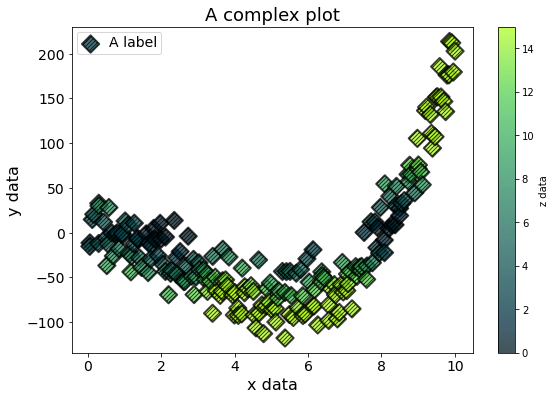

In [107]:
fig, axes = splt.subplots(figsize=(9,6))

### Using unnecessarily many kwargs to make a plot.
splt.scatter(x=xdata,y=ydata,c=cdata,cmap='scicm.T2G',vmin=0,vmax=15,label="A label",
             xlabel="x data",ylabel="y data",clabel='z data',title="A complex plot",
             s=150, marker='D', edgecolors='black',linewidths=2,hatch='//////',
             alpha=0.75,plotnonfinite=True)

### and just because we can, let's fix up the fonts
splt.adjust_text('xyklt', fontsize=(16,16,14,14,18))

plt.show()